In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [19]:
# Load the dataset
data = pd.read_csv('AAPL.csv')
# Assuming 'Close' column contains the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [20]:
# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60  # Adjust the time steps as needed
X, y = create_dataset(scaled_prices, time_steps)

# Reshape the data for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0],X.shape[1],1)

In [21]:
# Train-test split
split = int(0.8 * len(data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 7.6434e-05
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 2.7578e-06
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 3.0259e-06
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 2.7103e-06
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2.2192e-06
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 2078s 8s/step - loss: 2.4005e-06
Epoch 7/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1141s 4s/step - loss: 2.5393e-06
Epoch 8/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.2152e-06
Epoch 9/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.6223e-06
Epoch 10/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 2.0170e-06


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


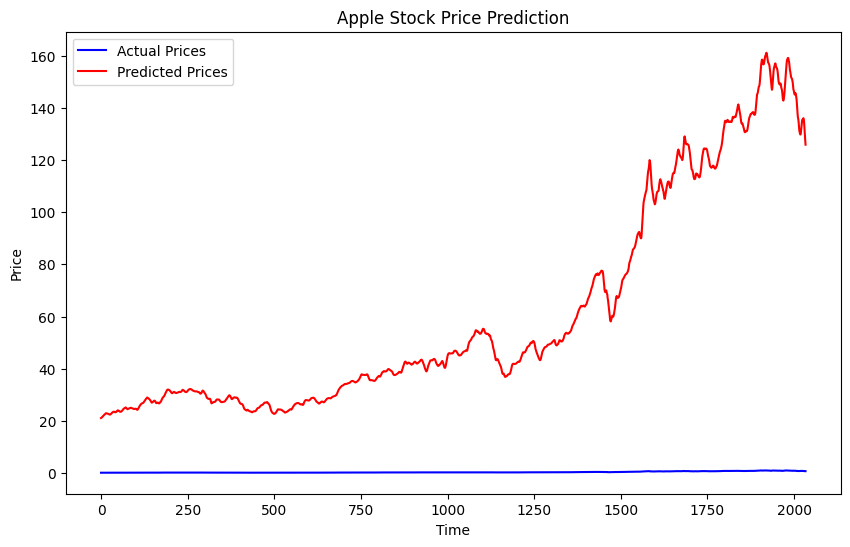

In [23]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [2]:
# In the first cell of the Jupyter Notebook:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('AAPL.csv')
# Assuming 'Close' column contains the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60  # Adjust the time steps as needed
X, y = create_dataset(scaled_prices, time_steps)

# Reshape the data for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
split = int(0.8 * len(data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 1.0237e-06
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.3638e-06
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 8.1388e-07
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 9.4816e-07
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.1621e-06
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.0687e-06
Epoch 7/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.1809e-06
Epoch 8/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 9.1304e-07
Epoch 9/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 7.4238e-07
Epoch 10/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 6.7732e-07
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


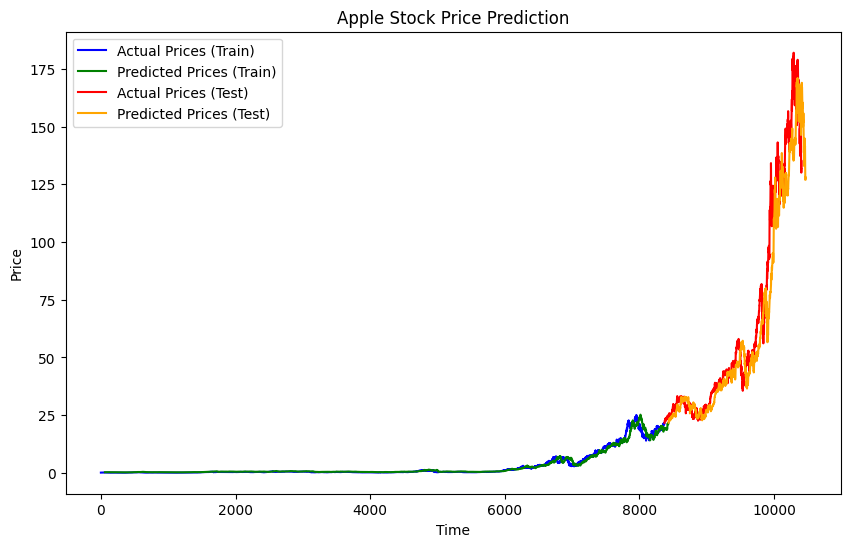

In [5]:
# In the second cell of the Jupyter Notebook:

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
predictions_train = model.predict(X_train)
predictions_train = scaler.inverse_transform(predictions_train)

predictions_test = model.predict(X_test)
predictions_test = scaler.inverse_transform(predictions_test)

# Visualize predictions
plt.figure(figsize=(10, 6))

# Plotting training data
# Plotting training data
plt.plot(range(0, len(y_train)), scaler.inverse_transform(y_train.reshape(-1, 1)), color='blue', label='Actual Prices (Train)')
plt.plot(range(time_steps, len(predictions_train) + time_steps), predictions_train, color='green', label='Predicted Prices (Train)')

# Plotting test data
# Plotting test data
plt.plot(range(len(y_train), len(y_train) + len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Actual Prices (Test)')
plt.plot(range(len(y_train) + time_steps, len(y_train) + len(predictions_test) + time_steps), predictions_test, color='orange', label='Predicted Prices (Test)')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
df = pd.read_csv('AAPL.csv')

# Pre-processing
df = df.dropna()
df = df[['Close']]
dataset = df.values
dataset = dataset.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split the data into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape the data into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plot the data
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predict the next day's price
last_day = dataset[len(dataset)-1]
last_day = np.reshape(last_day, (1, 1, 1))
next_day = model.predict(last_day)
next_day = scaler.inverse_transform(next_day)
print('Next Day\'s Predicted Price: %.2f' % (next_day[0][0]))

Epoch 1/10


c:\Users\dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8372/8372 - 6s - 729us/step - loss: 6.6619e-05
Epoch 2/10
8372/8372 - 5s - 600us/step - loss: 1.0559e-06
Epoch 3/10
8372/8372 - 5s - 571us/step - loss: 9.6004e-07
Epoch 4/10
8372/8372 - 5s - 581us/step - loss: 1.0425e-06
Epoch 5/10
8372/8372 - 5s - 591us/step - loss: 9.2983e-07
Epoch 6/10
8372/8372 - 5s - 570us/step - loss: 1.0048e-06
Epoch 7/10
8372/8372 - 5s - 575us/step - loss: 9.0294e-07
Epoch 8/10
8372/8372 - 5s - 549us/step - loss: 9.6600e-07
Epoch 9/10
8372/8372 - 5s - 558us/step - loss: 9.2215e-07
Epoch 10/10
8372/8372 - 5s - 579us/step - loss: 9.2871e-07
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


NameError: name 'math' is not defined